In [ ]:
from google.colab import files

uploaded = files.upload()

for filename, file_content in uploaded.items():
    print(f'Uploaded {filename} with length {len(file_content)} bytes')

Saving All India 2014-22.csv to All India 2014-22.csv
Uploaded All India 2014-22.csv with length 238 bytes


In [ ]:
import pandas as pd
df=pd.read_csv('All India 2014-22.csv')
df.head(5)

,Year,Primary,Upper Primary,Secondary
0,2014,4.67,3.13,14.54
1,2015,4.34,3.77,17.86
2,2016,4.13,4.03,17.06
3,2017,6.35,5.68,22.13
4,2018,3.51,5.02,18.93


              Year  Primary Dropout Rate  Upper Primary Dropout Rate  \
count     9.000000              9.000000                     9.00000   
mean   2018.000000              3.460000                     3.80000   
std       2.738613              1.846368                     1.15592   
min    2014.000000              0.760000                     2.27000   
25%    2016.000000              1.480000                     3.02000   
50%    2018.000000              4.130000                     3.77000   
75%    2020.000000              4.450000                     4.68000   
max    2022.000000              6.350000                     5.68000   

       Secondary Dropout Rate  
count                9.000000  
mean                16.795556  
std                  2.875157  
min                 12.610000  
25%                 14.540000  
50%                 17.060000  
75%                 17.900000  
max                 22.130000  


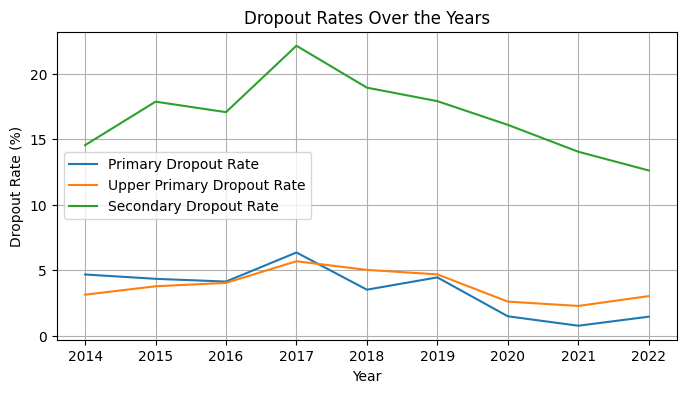

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame from the provided dropout rate data
data = {
    "Year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Primary Dropout Rate": [4.67, 4.34, 4.13, 6.35, 3.51, 4.45, 1.48, 0.76, 1.45],
    "Upper Primary Dropout Rate": [3.13, 3.77, 4.03, 5.68, 5.02, 4.68, 2.6, 2.27, 3.02],
    "Secondary Dropout Rate": [14.54, 17.86, 17.06, 22.13, 18.93, 17.9, 16.09, 14.04, 12.61]
}

df = pd.DataFrame(data)

# Descriptive statistics
desc_stats = df.describe()
print(desc_stats)

# Data visualization
plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['Primary Dropout Rate'], label='Primary Dropout Rate')
plt.plot(df['Year'], df['Upper Primary Dropout Rate'], label='Upper Primary Dropout Rate')
plt.plot(df['Year'], df['Secondary Dropout Rate'], label='Secondary Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates Over the Years')
plt.legend()
plt.grid(True)
plt.show()





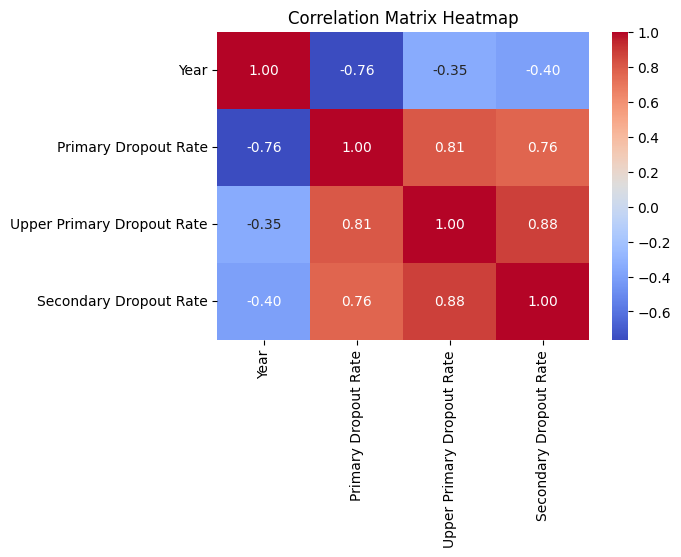

In [ ]:
# Correlation analysis
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Linear Regression to predict the dropout rates.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

# Sample dataset (replace this with your actual dataset)
data = {
    "Year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Primary Dropout Rate": [4.67, 4.34, 4.13, 6.35, 3.51, 4.45, 1.48, 0.76, 1.45],
    "Upper Primary Dropout Rate": [3.13, 3.77, 4.03, 5.68, 5.02, 4.68, 2.6, 2.27, 3.02],
    "Secondary Dropout Rate": [14.54, 17.86, 17.06, 22.13, 18.93, 17.9, 16.09, 14.04, 12.61]
}
df = pd.DataFrame(data)

# Prepare data for extended future years (predict for 10 years)
future_years = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]  # Adjust as needed
future_data = pd.DataFrame({'Year': future_years})

# Split the data into training and testing sets
X = df[['Year']]
y = df['Primary Dropout Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the future years
future_predictions = model.predict(future_data[['Year']])

# Combine the observed and predicted data
observed_and_predicted = df.append(pd.DataFrame({'Year': future_years, 'Primary Dropout Rate': future_predictions}), ignore_index=True)

# Create an interactive Plotly line chart
fig = px.line(observed_and_predicted, x='Year', y='Primary Dropout Rate', labels={'Primary Dropout Rate': 'Dropout Rate (%)'}, title='Primary Dropout Rate Predictions')
fig.add_scatter(x=future_data['Year'], y=future_predictions, mode='markers', name='Predicted', marker=dict(color='red', symbol='x'))
fig.show()

# Print the predictions for extended future years
print("Predictions for Extended Future Years:")
for year, prediction in zip(future_years, future_predictions):
    print(f"Year {year}: Predicted Dropout Rate for Primary Students = {prediction:.2f}")

# Calculate and print evaluation metrics for the model
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')



<ipython-input-6-4f28b13f6c5c>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  observed_and_predicted = df.append(pd.DataFrame({'Year': future_years, 'Primary Dropout Rate': future_predictions}), ignore_index=True)


Predictions for Extended Future Years:
Year 2023: Predicted Dropout Rate for Primary Students = 1.33
Year 2024: Predicted Dropout Rate for Primary Students = 0.85
Year 2025: Predicted Dropout Rate for Primary Students = 0.37
Year 2026: Predicted Dropout Rate for Primary Students = -0.10
Year 2027: Predicted Dropout Rate for Primary Students = -0.58
Year 2028: Predicted Dropout Rate for Primary Students = -1.06
Year 2029: Predicted Dropout Rate for Primary Students = -1.54
Year 2030: Predicted Dropout Rate for Primary Students = -2.02
Year 2031: Predicted Dropout Rate for Primary Students = -2.50
Year 2032: Predicted Dropout Rate for Primary Students = -2.97
Mean Squared Error: 1.50
R-squared: 0.53


In [ ]:
# Prepare data for extended future years (predict for 10 years)
future_years = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]  # Adjust as needed
future_data = pd.DataFrame({'Year': future_years})

# Split the data into training and testing sets
X = df[['Year']]
y = df['Upper Primary Dropout Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the future years
future_predictions = model.predict(future_data[['Year']])

# Combine the observed and predicted data
observed_and_predicted = df.append(pd.DataFrame({'Year': future_years, 'Upper Primary Dropout Rate': future_predictions}), ignore_index=True)

# Create an interactive Plotly line chart
fig = px.line(observed_and_predicted, x='Year', y='Upper Primary Dropout Rate', labels={'Upper Primary Dropout Rate': 'Dropout Rate (%)'}, title='Upper Primary Dropout Rate Predictions')
fig.add_scatter(x=future_data['Year'], y=future_predictions, mode='markers', name='Predicted', marker=dict(color='red', symbol='x'))
fig.show()

# Print the predictions for extended future years
print("Predictions for Extended Future Years:")
for year, prediction in zip(future_years, future_predictions):
    print(f"Year {year}: Predicted Dropout Rate for Upper Primary Students = {prediction:.2f}")

# Calculate and print evaluation metrics for the model
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


<ipython-input-8-5b1486502a31>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Predictions for Extended Future Years:
Year 2023: Predicted Dropout Rate for Upper Primary Students = 3.51
Year 2024: Predicted Dropout Rate for Upper Primary Students = 3.41
Year 2025: Predicted Dropout Rate for Upper Primary Students = 3.31
Year 2026: Predicted Dropout Rate for Upper Primary Students = 3.20
Year 2027: Predicted Dropout Rate for Upper Primary Students = 3.10
Year 2028: Predicted Dropout Rate for Upper Primary Students = 3.00
Year 2029: Predicted Dropout Rate for Upper Primary Students = 2.90
Year 2030: Predicted Dropout Rate for Upper Primary Students = 2.79
Year 2031: Predicted Dropout Rate for Upper Primary Students = 2.69
Year 2032: Predicted Dropout Rate for Upper Primary Students = 2.59
Mean Squared Error: 1.20
R-squared: -1.14


In [ ]:
# Prepare data for extended future years (predict for 10 years)
future_years = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]  # Adjust as needed
future_data = pd.DataFrame({'Year': future_years})

# Split the data into training and testing sets
X = df[['Year']]
y = df['Secondary Dropout Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the future years
future_predictions = model.predict(future_data[['Year']])

# Combine the observed and predicted data
observed_and_predicted = df.append(pd.DataFrame({'Year': future_years, 'Secondary Dropout Rate': future_predictions}), ignore_index=True)

# Create an interactive Plotly line chart
fig = px.line(observed_and_predicted, x='Year', y='Secondary Dropout Rate', labels={'Secondary Dropout Rate': 'Dropout Rate (%)'}, title='Secondary Dropout Rate Predictions')
fig.add_scatter(x=future_data['Year'], y=future_predictions, mode='markers', name='Predicted', marker=dict(color='red', symbol='x'))
fig.show()

# Print the predictions for extended future years
print("Predictions for Extended Future Years:")
for year, prediction in zip(future_years, future_predictions):
    print(f"Year {year}: Predicted Dropout Rate for Secondary Students = {prediction:.2f}")

# Calculate and print evaluation metrics for the model
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


<ipython-input-9-cbb716bf1535>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Predictions for Extended Future Years:
Year 2023: Predicted Dropout Rate for Secondary Students = 15.38
Year 2024: Predicted Dropout Rate for Secondary Students = 15.05
Year 2025: Predicted Dropout Rate for Secondary Students = 14.72
Year 2026: Predicted Dropout Rate for Secondary Students = 14.39
Year 2027: Predicted Dropout Rate for Secondary Students = 14.06
Year 2028: Predicted Dropout Rate for Secondary Students = 13.73
Year 2029: Predicted Dropout Rate for Secondary Students = 13.40
Year 2030: Predicted Dropout Rate for Secondary Students = 13.07
Year 2031: Predicted Dropout Rate for Secondary Students = 12.74
Year 2032: Predicted Dropout Rate for Secondary Students = 12.41
Mean Squared Error: 2.02
R-squared: 0.45
